<a href="https://colab.research.google.com/github/fleshuu/DLUB2021/blob/master/Seminar_3_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning UB 2021 
## Семинар 3 -- Logistic regress-ийг машин сургалтын аргаар бодъё.


# Өмнөх дугаарт ....

## Регресс ба ангилал

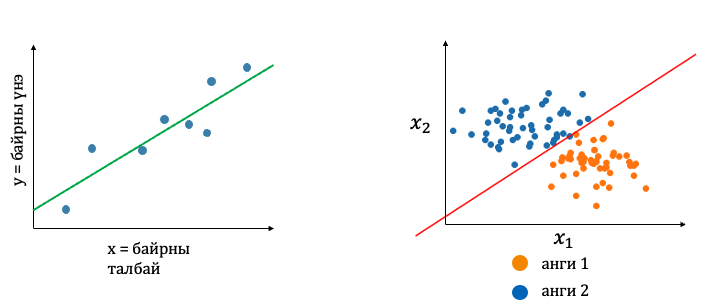

## Математикийн хэлээр


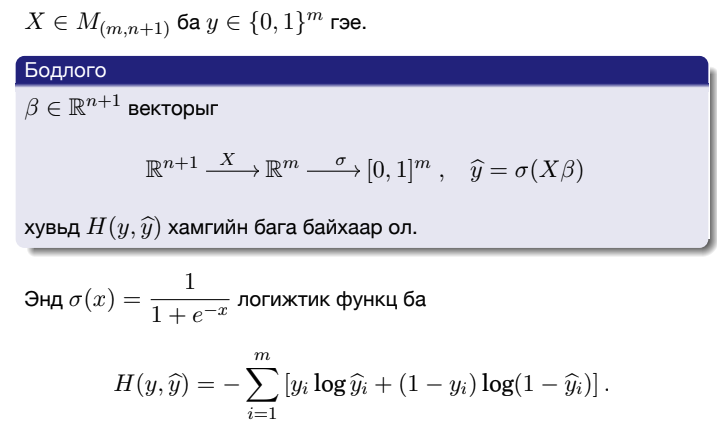

## Neural network дүрслэлээр  

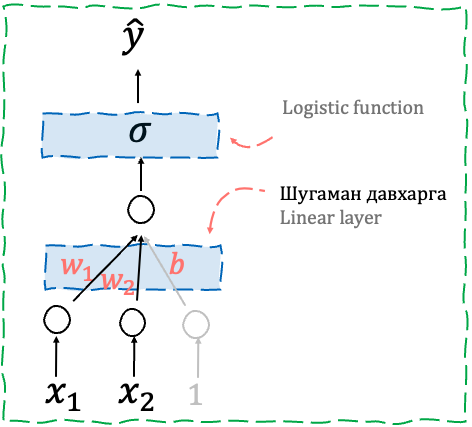

---
---
# За семинараа эхлэе! 



In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
# Өгөгдөлөө бэлдье. 
# 100 shirheg X, y uusgey 
# [-0.5, 0.5], [0.5, -0.5] tseguudiig  toirson random tseguud 

n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


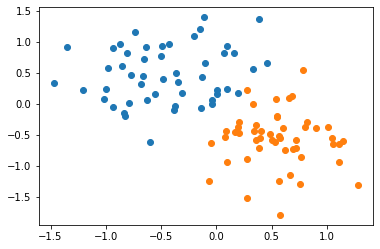

In [3]:
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

In [18]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)

  def forward(self, x):
    y_pred = self.linear(x)
    y_pred = torch.sigmoid(y_pred)
    return y_pred

  # def get_loss(self, y_pred, y):
  #   S = (y_pred - y).pow(2).sum() / len(y_pred)
  #   return S

  def get_params(self):
    [w, b] = self.parameters() #model
    w1, w2 = w.view(2)
    return w1.item(), w2.item(), b.item()

  def plot_model(self, x, y):
    w1, w2, b = self.get_params()
    # plt.scatter(x, y)
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    x1 = np.array([-2,2])
    x2 = (w1*x1 + b)/(-w2) # decision boundary homework, yaagaad ene?
    # y_1 = w*x_1 + b
    plt.plot(x1, x2, 'r')
    plt.show()   

In [19]:
model = LogisticRegression()
model

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [20]:
model.get_params()

(-0.16176524758338928, -0.1484338641166687, 0.0172469113022089)

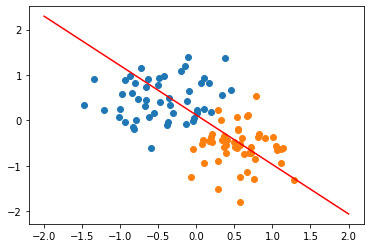

In [21]:
model.plot_model(X,y)

In [26]:
y_pred = model.forward(x_data)
print(x_data[:5])
print(y_pred[:5])

tensor([[-0.1372, -0.0715],
        [ 0.8044, -0.3706],
        [-0.6022, -0.6194],
        [ 0.5709, -0.5120],
        [ 0.0064,  0.1533]])
tensor([[0.5125],
        [0.4855],
        [0.5515],
        [0.5002],
        [0.4984]], grad_fn=<SliceBackward>)


0 0.5849330425262451


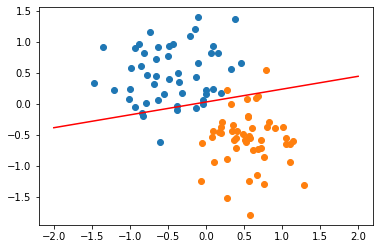

100 0.5048577785491943


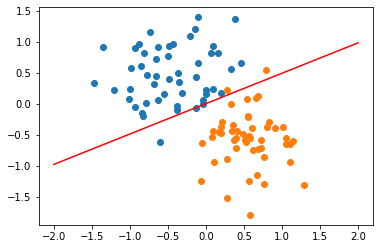

200 0.445801705121994


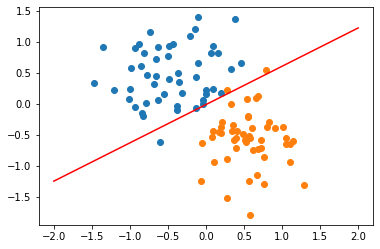

300 0.4009333848953247


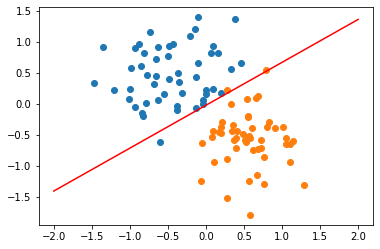

400 0.365866094827652


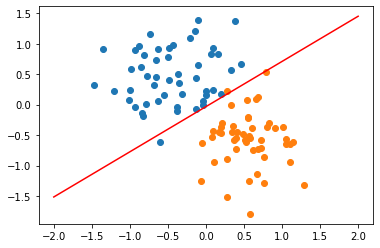

500 0.33776214718818665


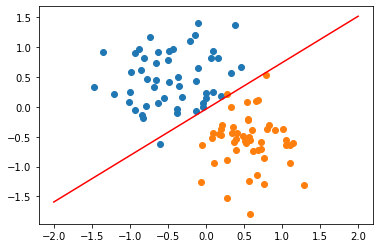

600 0.3147449791431427


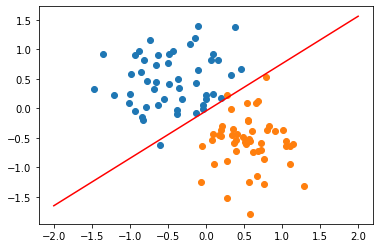

700 0.295540452003479


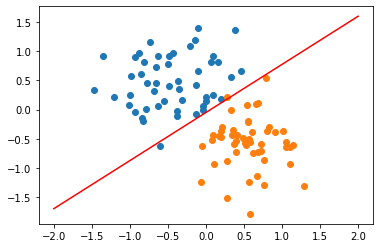

800 0.279260516166687


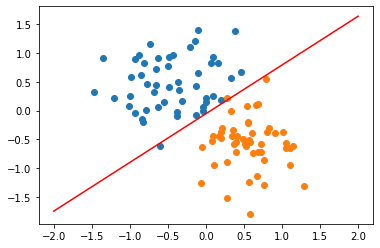

900 0.2652696967124939


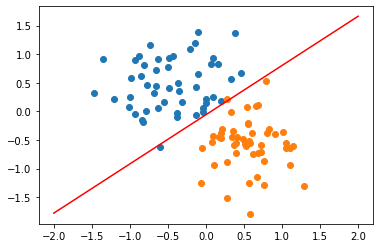

In [29]:
# Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epoch = 1000
losses = list()

# binary cross entropy aldaany function
BCEL = nn.BCELoss()
for i in range(epoch):
  y_pred = model.forward(x_data)
  S = BCEL(y_pred, y_data)

  optimizer.zero_grad()
  S.backward()
  optimizer.step()

  losses.append(S.item())

  if i % 100 == 0:
    print(i, S.item())
    model.plot_model(X, y)


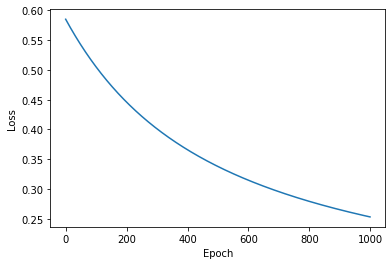

In [30]:
model.get_params()
# Алдаа (loss)-аа зурж үзье. 
plt.plot(range(epoch), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()